# CS381 Data Analytics Final Project

### Due on 12/11/2019 23:59 pm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [5]:
df = pd.read_csv("adult_income2.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project
* The second and third performance model with have 2 extra points capped at 20 points for the whole final project.




### Make sure your work include the following steps

* EDA (checking missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [ ]:
# Values of salary: salary = 0 means $80k or less, salary = 1 means more than $80k
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

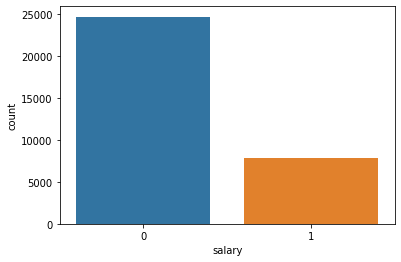

In [7]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

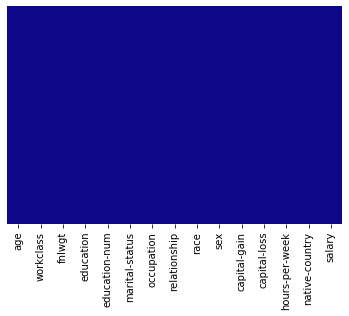

In [8]:
# Using heatmap to check for missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [9]:
# Double checking to make sure there are no missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [10]:
# Create a new data frame, df2, from the old one which includes just the numerical variables
df2 = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']]
df2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


# Model Training using Logistic Regression

In [11]:
# Model training and testing with data frame df2
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('salary', axis=1),
                                                    df2['salary'], test_size=0.20,
                                                    random_state = 101)
model = LogisticRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test,prediction))
print(f'Accuracy (in %): {accuracy_score(Y_test, prediction)*100}')

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4971
           1       0.68      0.27      0.38      1543

    accuracy                           0.80      6514
   macro avg       0.74      0.61      0.63      6514
weighted avg       0.78      0.80      0.76      6514

Accuracy (in %): 79.58243782622046


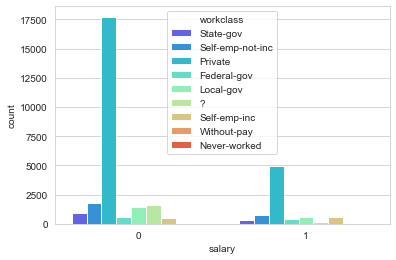

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='workclass',data=df,palette='rainbow')

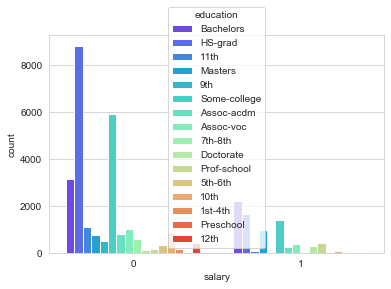

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='education',data=df,palette='rainbow')

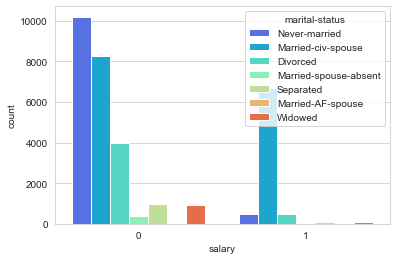

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='marital-status',data=df,palette='rainbow')

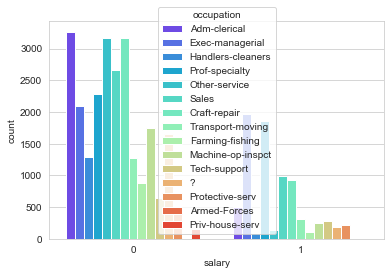

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='occupation',data=df,palette='rainbow')

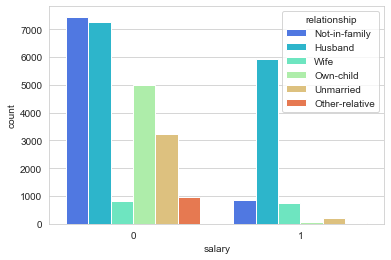

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='relationship',data=df,palette='rainbow')

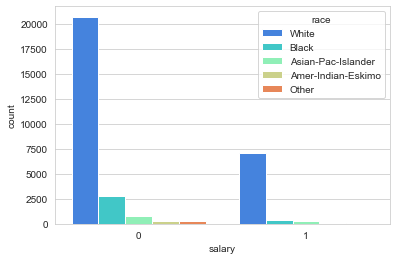

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='race',data=df,palette='rainbow')

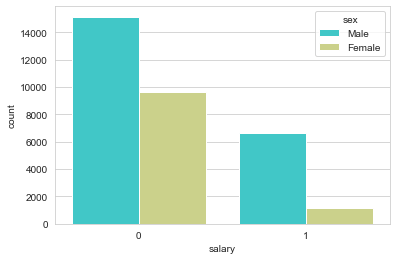

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='sex',data=df,palette='rainbow')

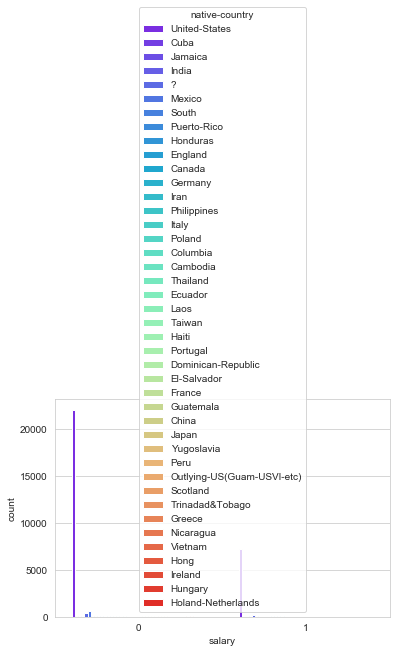

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='salary',hue='native-country',data=df,palette='rainbow')

In [20]:
# Including categorical variables using dummies
workclass = pd.get_dummies(df['workclass'])
education = pd.get_dummies(df['education'])
marital_status = pd.get_dummies(df['marital-status'])
occupation = pd.get_dummies(df['occupation'])
relationship = pd.get_dummies(df['relationship'])
race = pd.get_dummies(df['race'])
sex = pd.get_dummies(df['sex'])
native_country = pd.get_dummies(df['native-country'])

# Building a new data frame (df3) combining the numerical variable-only data frame and the dummies
df3 = pd.concat([df2, workclass, education, marital_status, occupation, relationship, race, sex, native_country], axis=1)
df3.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,?,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Model training and testing with df3
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop('salary',axis=1), 
                                                    df3['salary'], test_size=0.30, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print(classification_report(Y_test, prediction))
print(f'Accuracy score (in %): {accuracy_score(Y_test, prediction)*100}')

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7446
           1       0.69      0.26      0.38      2325

    accuracy                           0.80      9771
   macro avg       0.75      0.61      0.63      9771
weighted avg       0.78      0.80      0.76      9771

Accuracy score (in %): 79.55173472520724


# Performing a 10-fold Cross Validation of the Model for df3

In [22]:
from sklearn import metrics

In [23]:
# Using the education level and salary to perform the cross validation 
X = df3['education-num'].values.reshape(-1,1)
Y = df3['salary'].values.reshape(-1,1)

In [24]:
import random
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,10000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy': accuracy})
rdf

,Trial,Accuracy
0,0,0.777249
1,1,0.783543
2,2,0.772183
3,3,0.785078
4,4,0.774639
5,5,0.776635
6,6,0.779245
7,7,0.781394
8,8,0.785692
9,9,0.768499


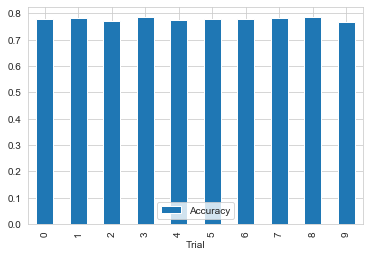

In [25]:
rdf.plot.bar(x='Trial', y='Accuracy')

For each trial, the accuracy remains more of less the same when using education-num and salary. The accuracy score for the models for df2 and df3 are the same, at 80%, rounding upwards. 